Libraries

In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# step forward feature selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# models
    # logistics regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Tutorial EDA

In [2]:
train_df = pd.read_csv('D:/Data science/Kaggle/SantanderCustomerSatisfaction/train.csv')
train_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
train_df.drop(labels=['TARGET'],axis=1,inplace=True)
train_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [4]:
test_df = pd.read_csv('D:/Data science/Kaggle/SantanderCustomerSatisfaction/test.csv')
test_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [5]:
train_df.shape, test_df.shape

((76020, 370), (75818, 370))

Remove constant features

In [6]:
sel = VarianceThreshold(threshold=0)
sel.fit(train_df)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [7]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
sum(sel.get_support())

336

In [8]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [9]:
# print the constant features
print(
    len([
        x for x in train_df.columns
        if x not in train_df.columns[sel.get_support()]
    ]))

[x for x in train_df.columns if x not in train_df.columns[sel.get_support()]]

34


['ind_var2_0',
 'ind_var2',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3']

In [10]:
train_df = sel.transform(train_df)
test_df = sel.transform(test_df)

train_df.shape, test_df.shape

((76020, 336), (75818, 336))

Univariate: Select KBest

In [11]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

In [12]:
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [13]:
# select the two best features
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

Univariate: Select Percentile

In [14]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [15]:
# now select features based on top 10 percentile
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
X_new.shape

(1797, 7)

Fisher score

In [16]:
# load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
# Load Data
# load iris data
iris = load_iris()

In [17]:
# create features and target
X = iris.data
y = iris.target

In [18]:
# convert to categorical data by converting data to integers
X = X.astype(int)
# Compare Chi-Squared Statistics
# select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


ANOVA F-value

In [19]:
# Load iris data
iris = load_iris()

# Create features and target
X = iris.data
y = iris.target


In [20]:
# Select Features With Best ANOVA F-Values
# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=2)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, y)
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


Correlation matrix (with heatmap)

In [21]:
# Load iris data
from sklearn.datasets import load_iris
iris = load_iris()

# Create features and target
X = iris.data
y = iris.target

In [22]:
# Convert feature matrix into DataFrame
df = pd.DataFrame(X)

# View the data frame
print(df)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [23]:
# Create correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

          0         1         2         3
0  1.000000 -0.117570  0.871754  0.817941
1 -0.117570  1.000000 -0.428440 -0.366126
2  0.871754 -0.428440  1.000000  0.962865
3  0.817941 -0.366126  0.962865  1.000000


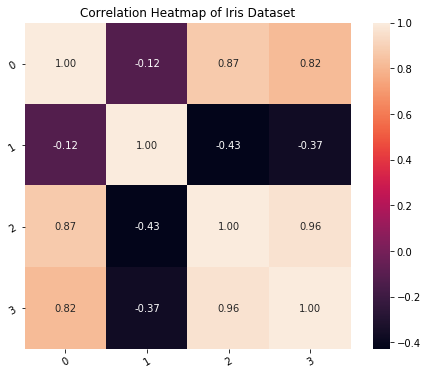

In [24]:
# Create correlation heatmap
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Iris Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()    

In [25]:
 # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper  

,0,1,2,3
0,NaN,-0.11757,0.871754,0.817941
1,NaN,NaN,-0.428440,-0.366126
2,NaN,NaN,NaN,0.962865
3,NaN,NaN,NaN,NaN


In [26]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

# Drop Marked Features
df1 = df.drop(df.columns[to_drop], axis=1)
print(df1)

[3]
       0    1    2
0    5.1  3.5  1.4
1    4.9  3.0  1.4
2    4.7  3.2  1.3
3    4.6  3.1  1.5
4    5.0  3.6  1.4
..   ...  ...  ...
145  6.7  3.0  5.2
146  6.3  2.5  5.0
147  6.5  3.0  5.2
148  6.2  3.4  5.4
149  5.9  3.0  5.1

[150 rows x 3 columns]


Real EDA

In [27]:
train_df = pd.read_csv('D:/Data science/Kaggle/SantanderCustomerSatisfaction/train.csv')
train_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [28]:
train_df.shape

(76020, 371)

In [29]:
train_df_var = train_df.drop(labels=['TARGET'],axis=1)
train_df_var.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=370)

In [30]:
sel = VarianceThreshold(threshold=0.01)
sel

VarianceThreshold(threshold=0.01)

In [31]:
sel.fit(train_df_var)
sum(sel.get_support())

273

In [32]:
len([x for x in train_df_var.columns if x not in train_df_var.columns[sel.get_support()]])

97

In [33]:
len(train_df_var.loc[:,train_df_var.columns[sel.get_support()]].columns)

273

In [34]:
train_df_new = train_df_var.loc[:,train_df_var.columns[sel.get_support()]]
train_df_new.shape

(76020, 273)

In [35]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,76020.0,75964.050723,43781.947379,1.00,38104.7500,76043.00,113748.7500,151838.00
var3,76020.0,-1523.199277,39033.462364,-999999.00,2.0000,2.00,2.0000,238.00
var15,76020.0,33.212865,12.956486,5.00,23.0000,28.00,40.0000,105.00
imp_ent_var16_ult1,76020.0,86.208265,1614.757313,0.00,0.0000,0.00,0.0000,210000.00
imp_op_var39_comer_ult1,76020.0,72.363067,339.315831,0.00,0.0000,0.00,0.0000,12888.03
...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,76020.0,1.858575,147.786584,0.00,0.0000,0.00,0.0000,24650.01
saldo_medio_var44_ult1,76020.0,76.026165,4040.337842,0.00,0.0000,0.00,0.0000,681462.90
saldo_medio_var44_ult3,76020.0,56.614351,2852.579397,0.00,0.0000,0.00,0.0000,397884.30
var38,76020.0,117235.809430,182664.598503,5163.75,67870.6125,106409.16,118756.2525,22034738.76


In [36]:
train_df_tar = train_df['TARGET']

train_df_tar.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [37]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_df_new,
    train_df_tar,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((53214, 273), (22806, 273))

In [38]:
X_train.head()
X_train.corr()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,1.000000,-0.002694,-0.001429,-0.004771,0.003904,0.001377,-0.004445,-0.004665,-0.007750,-0.006784,...,-0.009078,0.007105,0.007444,0.003968,0.004385,-0.003306,0.000275,-0.000197,0.001404,-0.002467
var3,-0.002694,1.000000,-0.003769,0.001790,0.005309,0.006322,0.001540,0.001697,0.000536,0.000632,...,0.000280,0.000738,0.000553,0.000732,0.000770,0.000642,0.000465,0.000769,0.000805,0.000140
var15,-0.001429,-0.003769,1.000000,0.042432,0.095696,0.101386,0.042572,0.045842,0.008120,0.009172,...,0.013782,0.027528,0.018402,0.028426,0.029238,0.031925,0.019212,0.034742,0.034995,0.004416
imp_ent_var16_ult1,-0.004771,0.001790,0.042432,1.000000,0.042590,0.035779,0.013211,0.012599,-0.000342,0.000678,...,0.008953,-0.000910,-0.000684,-0.000888,-0.000931,0.003087,-0.000595,0.006117,0.008007,-0.000348
imp_op_var39_comer_ult1,0.003904,0.005309,0.095696,0.042590,1.000000,0.889181,0.353187,0.304416,0.029921,0.051720,...,0.001317,0.023219,0.019279,0.018805,0.020868,0.010844,0.008638,0.013411,0.012702,0.009369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,-0.003306,0.000642,0.031925,0.003087,0.010844,0.009269,-0.000410,-0.000539,-0.000213,-0.000251,...,0.003746,-0.000277,-0.000208,-0.000275,-0.000289,1.000000,0.325992,0.821524,0.711449,0.002998
saldo_medio_var44_hace3,0.000275,0.000465,0.019212,-0.000595,0.008638,0.007333,-0.000430,-0.000469,-0.000152,-0.000179,...,-0.000079,-0.000197,-0.000148,-0.000196,-0.000206,0.325992,1.000000,0.243201,0.218338,0.001874
saldo_medio_var44_ult1,-0.000197,0.000769,0.034742,0.006117,0.013411,0.012048,-0.000168,-0.000447,-0.000257,-0.000302,...,0.011152,-0.000332,-0.000250,-0.000331,-0.000347,0.821524,0.243201,1.000000,0.968123,0.003435
saldo_medio_var44_ult3,0.001404,0.000805,0.034995,0.008007,0.012702,0.011334,-0.000296,-0.000542,-0.000269,-0.000316,...,0.009235,-0.000348,-0.000262,-0.000346,-0.000364,0.711449,0.218338,0.968123,1.000000,0.003031


In [39]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)))

correlated features:  150


In [40]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

C:\Users\paw\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((53214, 123), (22806, 123))

In [41]:
checkNA = X_train.isnull().sum()
checkNA[checkNA > 0]

Series([], dtype: int64)

In [42]:
## For Forward selection processing: It normally takes so long so skip it when got a list of mose related variables

# sfs1 = SFS(RandomForestRegressor(), 
#            k_features=10, 
#            forward=True, 
#            floating=False, 
#            verbose=2,
#            scoring='r2',
#            cv=3)

# sfs1 = sfs1.fit(np.array(X_train), y_train)


In [43]:
# X_train.columns[list(sfs1.k_feature_idx_)]

In [44]:
# var_selected = pd.DataFrame({'var' : X_train.columns[list(sfs1.k_feature_idx_)]})
# var_selected

In [45]:
# file_loc = 'D:/Data science/Kaggle/SantanderCustomerSatisfaction/'
# file_name = 'var_selected.csv'

# var_selected.to_csv(file_loc+file_name,index=False)

In [46]:
var_selected = pd.read_csv('D:/Data science/Kaggle/SantanderCustomerSatisfaction/var_selected.csv')

var_selected.var

<bound method DataFrame.var of                              var
0                          var15
1        imp_op_var40_efect_ult1
2                       num_var4
3      delta_imp_reemb_var17_1y3
4      delta_imp_reemb_var33_1y3
5   delta_imp_trasp_var17_in_1y3
6  delta_imp_trasp_var33_out_1y3
7          imp_compra_var44_ult1
8       imp_trasp_var17_in_hace3
9        saldo_medio_var17_hace2>

In [47]:
y_train.head()

7526     0
51929    0
46677    0
46194    0
20190    0
Name: TARGET, dtype: int64

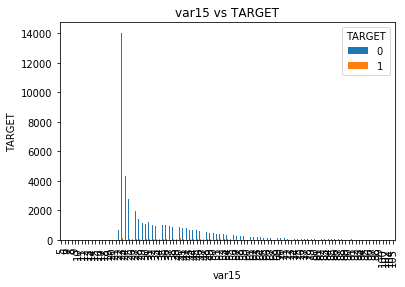

In [48]:
%matplotlib inline

pd.crosstab(X_train.var15,y_train).plot(kind='bar')
plt.title('var15 vs TARGET')
plt.xlabel('var15')
plt.ylabel('TARGET')
plt.savefig('var15_v_TARGET')

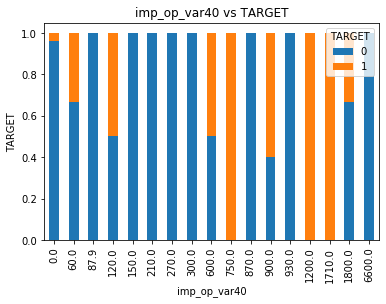

In [49]:
table = pd.crosstab(X_train.imp_op_var40_efect_ult1,y_train)

table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('imp_op_var40 vs TARGET')
plt.xlabel('imp_op_var40')
plt.ylabel('TARGET')
plt.savefig('imp_op_var40_v_TARGET')

Fit Logistic Regression

In [50]:
var_selected.transpose().iloc[0]

# var_array = va
# var_array

0                            var15
1          imp_op_var40_efect_ult1
2                         num_var4
3        delta_imp_reemb_var17_1y3
4        delta_imp_reemb_var33_1y3
5     delta_imp_trasp_var17_in_1y3
6    delta_imp_trasp_var33_out_1y3
7            imp_compra_var44_ult1
8         imp_trasp_var17_in_hace3
9          saldo_medio_var17_hace2
Name: var, dtype: object

In [51]:
X_train10var = X_train.loc[:,var_selected.transpose().iloc[0]]

X_train10var.columns

Index(['var15', 'imp_op_var40_efect_ult1', 'num_var4',
       'delta_imp_reemb_var17_1y3', 'delta_imp_reemb_var33_1y3',
       'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var33_out_1y3',
       'imp_compra_var44_ult1', 'imp_trasp_var17_in_hace3',
       'saldo_medio_var17_hace2'],
      dtype='object')

In [52]:

logreg = LogisticRegression()
logreg.fit(X_train10var,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
X_test10var = X_test.loc[:,var_selected.transpose().iloc[0]]

pred = logreg.predict(X_test10var)

In [54]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test10var, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


In [55]:
confusion_matrix = confusion_matrix(y_test,pred)
confusion_matrix

array([[21892,     0],
       [  914,     0]], dtype=int64)

In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21892
           1       0.00      0.00      0.00       914

    accuracy                           0.96     22806
   macro avg       0.48      0.50      0.49     22806
weighted avg       0.92      0.96      0.94     22806



C:\Users\paw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
logreg.predict_proba(X_test10var)[:,1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

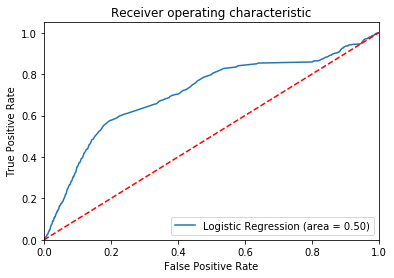

In [61]:
logit_roc_auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test10var)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [65]:
test_df = pd.read_csv('D:/Data science/Kaggle/SantanderCustomerSatisfaction/test.csv')
print(test_df.head())
print(test_df.shape)

   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   2     2     32                 0.0                      0.0   
1   5     2     35                 0.0                      0.0   
2   6     2     23                 0.0                      0.0   
3   7     2     24                 0.0                      0.0   
4   9     2     23                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...

In [66]:
test_df10var = test_df.loc[:,var_selected.transpose().iloc[0]]

print(test_df10var.shape)
print(test_df10var.columns)
print(test_df10var.head())

(75818, 10)
Index(['var15', 'imp_op_var40_efect_ult1', 'num_var4',
       'delta_imp_reemb_var17_1y3', 'delta_imp_reemb_var33_1y3',
       'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var33_out_1y3',
       'imp_compra_var44_ult1', 'imp_trasp_var17_in_hace3',
       'saldo_medio_var17_hace2'],
      dtype='object')
   var15  imp_op_var40_efect_ult1  num_var4  delta_imp_reemb_var17_1y3  \
0     32                      0.0         1                          0   
1     35                      0.0         1                          0   
2     23                      0.0         2                          0   
3     24                      0.0         0                          0   
4     23                      0.0         1                          0   

   delta_imp_reemb_var33_1y3  delta_imp_trasp_var17_in_1y3  \
0                          0                             0   
1                          0                             0   
2                          0                    

In [70]:
final_pred = logreg.predict(test_df10var)

final_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
test_df['ID'].head()

result_df = pd.DataFrame({'ID':test_df['ID'], 'TARGET':final_pred})
print(result_df.head())
print(result_df.shape)

   ID  TARGET
0   2       0
1   5       0
2   6       0
3   7       0
4   9       0
(75818, 2)


In [75]:
result_df.describe()

,ID,TARGET
count,75818.000000,75818.000000
mean,75874.830581,0.000013
std,43882.370827,0.003632
min,2.000000,0.000000
25%,37840.250000,0.000000
50%,75810.000000,0.000000
75%,113996.500000,0.000000
max,151837.000000,1.000000


In [76]:
file_loc = 'D:/Data science/Kaggle/SantanderCustomerSatisfaction/'
file_name = 'submission.csv'

result_df.to_csv(file_loc+file_name,index=False)